In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
df=pd.read_csv('/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
#loading the dataset
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [30]:
len(df.columns)

2549

In [31]:
sample=df.loc[0,'fft_0_b':'fft_749_b']

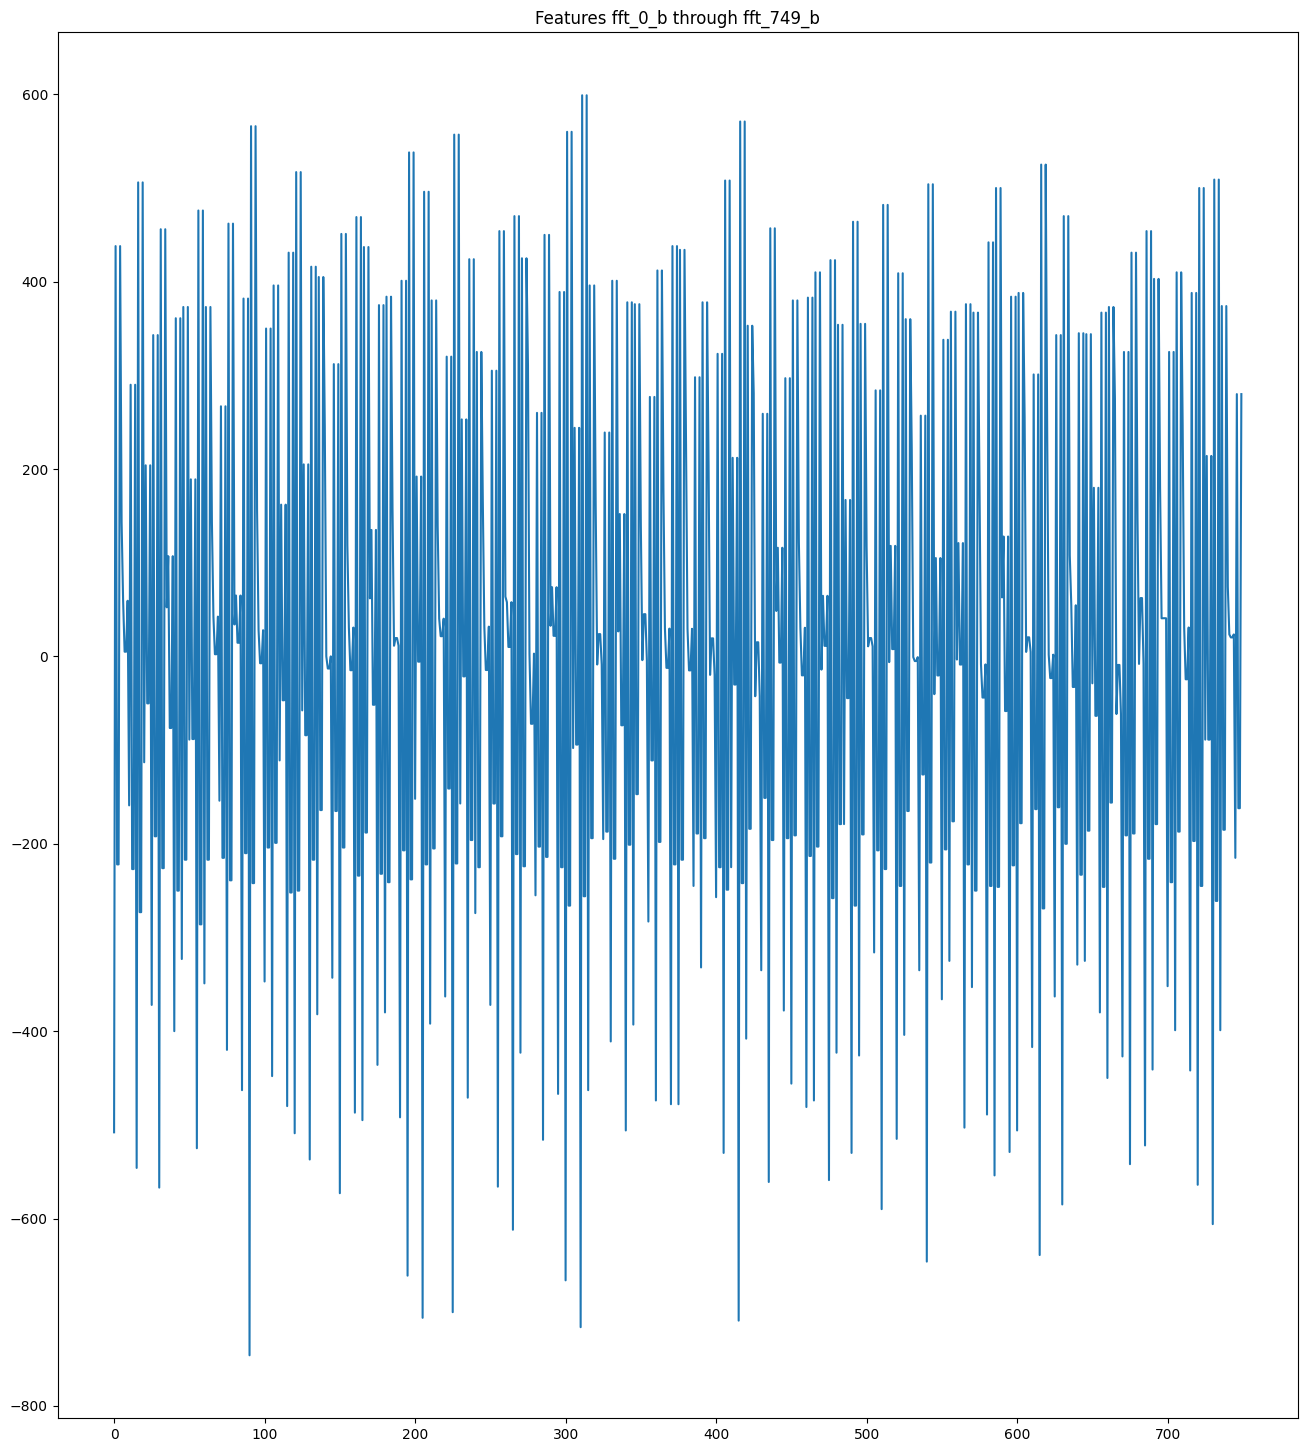

In [32]:
plt.figure(figsize=(16,18))
plt.plot(range(len(sample)),sample)
plt.title('Features fft_0_b through fft_749_b')
plt.show()

In [33]:
sample

fft_0_b     -508.0
fft_1_b      438.0
fft_2_b     -222.0
fft_3_b     -222.0
fft_4_b      438.0
             ...  
fft_745_b   -215.0
fft_746_b    280.0
fft_747_b   -162.0
fft_748_b   -162.0
fft_749_b    280.0
Name: 0, Length: 750, dtype: object

In [34]:
df['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [35]:
label_mapping={'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2}


In [36]:
#preprocessing function
def preprocessing_inputs(df):
    df=df.copy()
    df['label']=df['label'].replace(label_mapping)
    y=df['label'].copy()
    x=df.drop('label',axis=1).copy()
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    
    return x_train,x_test,y_train,y_test

In [37]:
x_train,x_test,y_train,y_test=preprocessing_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1492, 2548)
(640, 2548)
(1492,)
(640,)


In [38]:
#training the model
inputs=tf.keras.Input(shape=(x_train.shape[1],))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                163136    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 167491 (654.26 KB)
Trainable params: 167491 (654.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [40]:
history=model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                  batch_size=32,
                  epochs=50,
                  callbacks=[tf.keras.callbacks.EarlyStopping(
                  monitor='val_loss',
                  patience=5,
                  restore_best_weights=True)])

Epoch 1/50
38/38 [==============================] - 1s 7ms/step - loss: 43483712716800.0000 - accuracy: 0.4979 - val_loss: 9106416992256.0000 - val_accuracy: 0.5351
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 35401649618944.0000 - accuracy: 0.5465 - val_loss: 10690955837440.0000 - val_accuracy: 0.5619
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 24877801144320.0000 - accuracy: 0.5792 - val_loss: 339480051712.0000 - val_accuracy: 0.6355
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 22894379794432.0000 - accuracy: 0.6479 - val_loss: 12720785063936.0000 - val_accuracy: 0.5819
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 16804245143552.0000 - accuracy: 0.5214 - val_loss: 5019513389056.0000 - val_accuracy: 0.5418
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 21560872140800.0000 - accuracy: 0.5532 - val_loss: 16795678277632.0000 - val_accuracy: 0.5786
Epoch 7/

In [ ]:
Results

In [41]:
model_acc=model.evaluate(x_test,y_test,verbose=0)[1]
print('Test Accuracy: {:.3f}%'.format(model_acc*100))

Test Accuracy: 65.000%


In [44]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_pred,y_test)

20/20 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [46]:
y_test

918     0
1233    1
745     1
887     0
700     1
       ..
1100    0
891     2
1508    0
763     0
208     2
Name: label, Length: 640, dtype: int64